In [11]:
from isolation import isolation
from isolation import Isolation, DebugState
import random
from tqdm.auto import tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
initial_state = Isolation()

- Board representation

In [5]:
initial_state

Isolation(board=41523161203939122082683632224299007, ply_count=0, locs=(None, None))

In [13]:
initial_state.board

41523161203939122082683632224299007

In [10]:
print(DebugState.from_state(initial_state))


+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +



In [11]:
DebugState.from_state(initial_state).bitboard_string

'1111111111100111111111110011111111111001111111111100111111111110011111111111001111111111100111111111110011111111111'

- locations

In [15]:
initial_state.locs

(None, None)

- Active player

In [17]:
initial_state.player()

0

- available Moves / actions

In [22]:
print(initial_state.actions())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]


- Moves

In [30]:
random.seed(0)
action = random.choice(initial_state.actions())
action

57

In [33]:
state = initial_state.result(action)
state

Isolation(board=41523161203939121938568444148443135, ply_count=1, locs=(57, None))

- available Moves / actions

In [36]:
pos_player_0 = state.locs[0]
state.liberties(pos_player_0)

[82, 68, 42, 30, 32, 46, 72, 84]

In [38]:
print(state.actions())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]


In [39]:
print(DebugState.from_state(state))


+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   | 1 |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +



# BUILD OPENING TABLE

- alpha - beta pruning

In [3]:
def alpha_beta_search(gameState):
    """ Return the move along a branch of the game tree that
    has the best possible value.  A move is a pair of coordinates
    in (column, row) order corresponding to a legal move for
    the searching player.
    
    You can ignore the special case of calling this function
    from a terminal state.
    """
    alpha = float("-inf")
    beta = float("inf")
    best_score = float("-inf")
    best_move = None
    for a in gameState.actions():
        v = min_value(gameState.result(a), alpha, beta)
        alpha = max(alpha, v)
        if v > best_score:
            best_score = v
            best_move = a
    return best_move

# TODO: modify the function signature to accept an alpha and beta parameter
def min_value(gameState, alpha, beta):
    """ Return the value for a win (+1) if the game is over,
    otherwise return the minimum value over all legal child
    nodes.
    """
    if gameState.terminal_test():
        return gameState.utility(0)
    
    v = float("inf")
    for a in gameState.actions():
        v = min(v, max_value(gameState.result(a), alpha, beta))
        if v <= alpha:
            return v
        beta = min(beta, v)
    return v

# TODO: modify the function signature to accept an alpha and beta parameter
def max_value(gameState, alpha, beta):
    """ Return the value for a loss (-1) if the game is over,
    otherwise return the maximum value over all legal child
    nodes.
    """
    if gameState.terminal_test():
        return gameState.utility(0)
    
    v = float("-inf")
    for a in gameState.actions():
        v = max(v, min_value(gameState.result(a), alpha, beta))
        if v >= beta:
            return v
        alpha = max(alpha, v)
    return v

- iterative deepening

In [4]:
# DO NOT MODIFY THE PLAYER ID
player_id = 0

def my_moves(gameState):
    loc = gameState.locs[player_id]
    return len(gameState.liberties(loc))

def minimax_decision(gameState, depth):
    """ Return the move along a branch of the game tree that
    has the best possible value.  A move is a pair of coordinates
    in (column, row) order corresponding to a legal move for
    the searching player.
    
    You can ignore the special case of calling this function
    from a terminal state.
    """
    best_score = float("-inf")
    best_move = None
    for a in gameState.actions():
        # call has been updated with a depth limit
        v = min_value(gameState.result(a), depth - 1)
        if v > best_score:
            best_score = v
            best_move = a
    return best_move


def min_value(gameState, depth):
    """ Return the value for a win (+1) if the game is over,
    otherwise return the minimum value over all legal child
    nodes.
    """
    if gameState.terminal_test():
        return gameState.utility(0)
    
    if depth <= 0:
        return my_moves(gameState)
    
    v = float("inf")
    for a in gameState.actions():
        # the depth should be decremented by 1 on each call
        v = min(v, max_value(gameState.result(a), depth - 1))
    return v


def max_value(gameState, depth):
    """ Return the value for a loss (-1) if the game is over,
    otherwise return the maximum value over all legal child
    nodes.
    """
    if gameState.terminal_test():
        return gameState.utility(0)
    
    if depth <= 0:
        return my_moves(gameState)
    
    v = float("-inf")
    for a in gameState.actions():
        # the depth should be decremented by 1 on each call
        v = max(v, min_value(gameState.result(a), depth - 1))
    return v



def get_action(gameState, depth_limit):
    # TODO: Implement a function that calls minimax_decision
    # for each depth from 1...depth_limit (inclusive of both endpoints)
    for depth in range(1, depth_limit + 1):
        action = minimax_decision(gameState, depth)
        print("Depth: {} -> Action: {}".format(depth, action))

In [49]:
depth_limit = 5
game = Isolation()
get_action(game, depth_limit)

Depth: 1 -> Action: 28
Depth: 2 -> Action: 28
Depth: 3 -> Action: 16
Depth: 4 -> Action: 56
Depth: 5 -> Action: 1


- Alpha Beta pruning + diterative deepening

In [2]:
def my_moves(gameState):
    return len(gameState.liberties(gameState.locs[0])) - len(gameState.liberties(gameState.locs[1]))


def alpha_beta_search(gameState, depth):
    """ Return the move along a branch of the game tree that
    has the best possible value.  A move is a pair of coordinates
    in (column, row) order corresponding to a legal move for
    the searching player.
    
    You can ignore the special case of calling this function
    from a terminal state.
    """
    alpha = float("-inf")
    beta = float("inf")
    best_score = float("-inf")
    best_move = None
    for a in gameState.actions():
        v = min_value(gameState.result(a), alpha, beta, depth - 1)
        alpha = max(alpha, v)
        if v > best_score:
            best_score = v
            best_move = a
    return best_move

# TODO: modify the function signature to accept an alpha and beta parameter
def min_value(gameState, alpha, beta, depth):
    """ Return the value for a win (+1) if the game is over,
    otherwise return the minimum value over all legal child
    nodes.
    """
    if gameState.terminal_test():
        return gameState.utility(0)
    
    if depth <= 0:
        return my_moves(gameState)
    
    v = float("inf")
    for a in gameState.actions():
        v = min(v, max_value(gameState.result(a), alpha, beta, depth - 1))
        if v <= alpha:
            return v
        beta = min(beta, v)
    return v

# TODO: modify the function signature to accept an alpha and beta parameter
def max_value(gameState, alpha, beta, depth):
    """ Return the value for a loss (-1) if the game is over,
    otherwise return the maximum value over all legal child
    nodes.
    """
    if gameState.terminal_test():
        return gameState.utility(0)
    
    if depth <= 0:
        return my_moves(gameState)
    
    v = float("-inf")
    for a in gameState.actions():
        v = max(v, min_value(gameState.result(a), alpha, beta, depth -1))
        if v >= beta:
            return v
        alpha = max(alpha, v)
    return v

def get_action(gameState, depth_limit):
    # TODO: Implement a function that calls minimax_decision
    # for each depth from 1...depth_limit (inclusive of both endpoints)
    for depth in range(1, depth_limit + 1):
        action = alpha_beta_search(gameState, depth)
        print("Depth: {} -> Action: {}".format(depth, action))

In [56]:
depth_limit = 10
game = Isolation()
get_action(game, depth_limit)

Depth: 1 -> Action: 28
Depth: 2 -> Action: 28
Depth: 3 -> Action: 3
Depth: 4 -> Action: 16
Depth: 5 -> Action: 0
Depth: 6 -> Action: 1
Depth: 7 -> Action: 0
Depth: 8 -> Action: 0
Depth: 9 -> Action: 0
Depth: 10 -> Action: 0


- BUILD TABLE

In [23]:
NUM_ROUNDS = 5_000
depth_limit = 100
opening_book = pd.DataFrame()

In [46]:
def build_table(num_rounds=NUM_ROUNDS, depth=5):
    # Builds a table that maps from game state -> action
    # by choosing the action that accumulates the most
    # wins for the active player. (Note that this uses
    # raw win counts, which are a poor statistic to
    # estimate the value of an action; better statistics
    # exist.)
    from collections import defaultdict, Counter
    book = defaultdict(Counter)
    for _ in range(num_rounds):
        state = Isolation()
        build_tree(state, book, depth)
    return {k: max(v, key=v.get) for k, v in book.items()}


def build_tree(state, book, depth):
    if depth <= 0 or state.terminal_test():
        return -simulate(state)
    action = random.choice(state.actions())
    reward = build_tree(state.result(action), book, depth - 1)
    book[state][action] += reward
    return -reward


def simulate(state):
    player_id = state.player()
    while not state.terminal_test():
        state = state.result(random.choice(state.actions()))
    return -1 if state.utility(player_id) < 0 else 1

- repeat multiple time all code below till concat step below to aggregate opening with success rate > 60%

In [47]:
book = build_table(NUM_ROUNDS, depth_limit)
book

{Isolation(board=40507856675441577427124067045761693, ply_count=63, locs=(79, 15)): <Action.ESE: -15>,
 Isolation(board=40507856676046040336931381633114781, ply_count=62, locs=(94, 15)): <Action.ESE: -15>,
 Isolation(board=40507856676046040336931381633147549, ply_count=61, locs=(94, 40)): <Action.SSW: -25>,
 Isolation(board=40507876483086668903015780019135133, ply_count=60, locs=(105, 40)): <Action.WSW: -11>,
 Isolation(board=40507876483086668903016879530762909, ply_count=59, locs=(105, 29)): <Action.ENE: 11>,
 Isolation(board=40548441302293972243864774033334941, ply_count=58, locs=(78, 29)): <Action.NNW: 27>,
 Isolation(board=40548441302293972243864774570205853, ply_count=57, locs=(78, 44)): <Action.ESE: -15>,
 Isolation(board=40548441302596203698768431863882397, ply_count=56, locs=(93, 44)): <Action.ESE: -15>,
 Isolation(board=40548441302596203698786024049926813, ply_count=55, locs=(93, 17)): <Action.NNW: 27>,
 Isolation(board=40548451206116517981828223242920605, ply_count=54, locs=(

In [48]:
len(book)

232925

In [49]:
#win_moves = {}
win_moves_df = pd.DataFrame(columns=['win', 'loss'], index=range(0, 115)).fillna(0)

for i, b in enumerate(tqdm(list(book))):
    new_b = b.result(book[b])
    if new_b.terminal_test():
        dbstate = DebugState.from_state(new_b)
        #print(dbstate)
        winner = [0 if new_b.utility(0)>0 else 1][0]
        #print("turn: {}, player {} won".format(new_b.player()+1, winner+1))
    
        #find initial move
        num_moves = b.ply_count
        try:
            initial_state = list(book)[i + num_moves - 1]
            initial_move = initial_state.locs[0]
            if winner == 0:
                win_moves_df.loc[initial_move,'win']+=1
                #win_moves[initial_move] = win_moves.get(initial_move,0) + 1
            else:
                win_moves_df.loc[initial_move,'loss']+=1
                #win_moves[initial_move] = win_moves.get(initial_move,0) - 1
        except:
            pass

C:\Users\lveys\AppData\Local\Temp\ipykernel_26320\2309938545.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  win_moves_df = pd.DataFrame(columns=['win', 'loss'], index=range(0, 115)).fillna(0)


  0%|          | 0/232925 [00:00<?, ?it/s]

In [50]:
win_moves_df.drop(win_moves_df.loc[(win_moves_df['win']== 0) & (win_moves_df['loss']== 0)].index, inplace=True)
win_moves_df['net'] = win_moves_df['win'] - win_moves_df['loss']
win_moves_df['loss'] = win_moves_df['loss'] * -1
win_moves_df['% win'] = (win_moves_df['win'] / (win_moves_df['win'] - win_moves_df['loss']) * 100).round(1)
win_moves_df.sort_values('net', ascending=False)

,win,loss,net,% win
112,51,-31,20,62.2
36,49,-33,16,59.8
99,69,-57,12,54.8
81,25,-14,11,64.1
21,75,-64,11,54.0
...,...,...,...,...
39,11,-23,-12,32.4
84,14,-27,-13,34.1
94,24,-38,-14,38.7
87,52,-66,-14,44.1


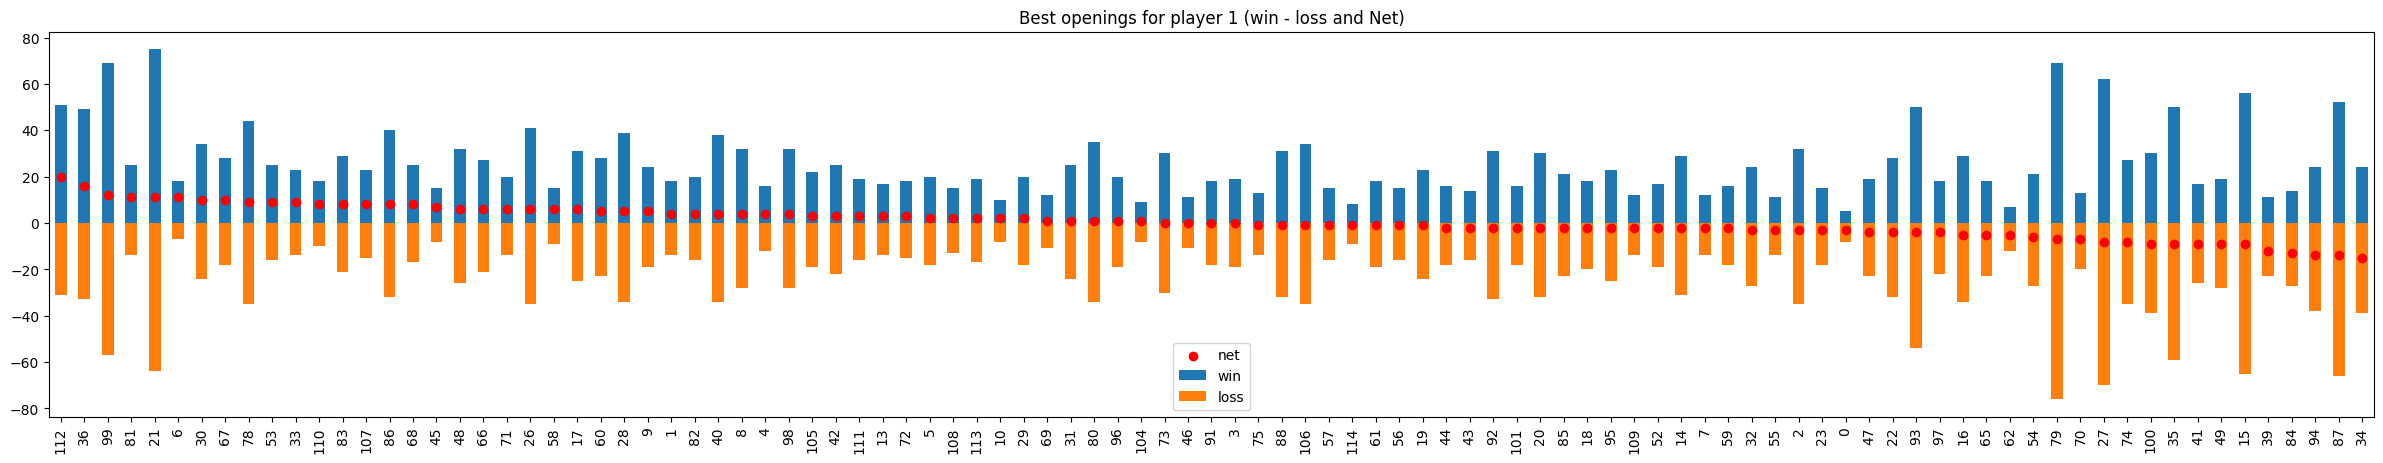

In [51]:
fig, ax = plt.subplots(figsize=(30,5))
sorted_win_moves_df = win_moves_df.sort_values('net', ascending=False)
sorted_win_moves_df[['win','loss']].plot(kind='bar',stacked=True, ax=ax)
ax.scatter(sorted_win_moves_df.index.astype(str), sorted_win_moves_df['net'],  color=[1,0,0], label='net')
ax.legend()
plt.title("Best openings for player 1 (win - loss and Net)")
plt.show()

In [52]:
sorted_win_moves_df

,win,loss,net,% win
112,51,-31,20,62.2
36,49,-33,16,59.8
99,69,-57,12,54.8
81,25,-14,11,64.1
21,75,-64,11,54.0
...,...,...,...,...
39,11,-23,-12,32.4
84,14,-27,-13,34.1
94,24,-38,-14,38.7
87,52,-66,-14,44.1


In [56]:
opening_book = pd.concat([opening_book,sorted_win_moves_df[sorted_win_moves_df['% win']>60]])
opening_book = opening_book.reset_index().groupby('index').sum()
opening_book['% win'] = (opening_book['win'] / (opening_book['win'] - opening_book['loss']) * 100).round(1)
opening_book

,win,loss,net,% win
index,,,,
1,16,-8,8,66.7
4,18,-9,9,66.7
6,18,-7,11,72.0
13,22,-11,11,66.7
16,43,-23,20,65.2
18,20,-12,8,62.5
32,34,-15,19,69.4
33,23,-14,9,62.2
45,15,-8,7,65.2


- vizualize a winning opening

In [57]:
game = Isolation()
game = game.result(1)
dbstate = DebugState.from_state(game)
print(dbstate)


+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   |   |   |
+ - + - + - + - + - + - + - + - + - + - + - +
|   |   |   |   |   |   |   |   |   | 1 |   |
+ - + - + - + - + - + - + - + - + - + - + - +



- Gather all winning openings sequences from first to final move (we remove from book all losing sequence + winning sequence with poor % success)

In [88]:
list(book)[i: i + num_moves]

[Isolation(board=40874103980096630241687853072377855, ply_count=3, locs=(94, 88))]

In [89]:
book

{Isolation(board=40507856675441577427124067045761693, ply_count=63, locs=(79, 15)): <Action.ESE: -15>,
 Isolation(board=40507856676046040336931381633114781, ply_count=62, locs=(94, 15)): <Action.ESE: -15>,
 Isolation(board=40507856676046040336931381633147549, ply_count=61, locs=(94, 40)): <Action.SSW: -25>,
 Isolation(board=40507876483086668903015780019135133, ply_count=60, locs=(105, 40)): <Action.WSW: -11>,
 Isolation(board=40507876483086668903016879530762909, ply_count=59, locs=(105, 29)): <Action.ENE: 11>,
 Isolation(board=40548441302293972243864774033334941, ply_count=58, locs=(78, 29)): <Action.NNW: 27>,
 Isolation(board=40548441302293972243864774570205853, ply_count=57, locs=(78, 44)): <Action.ESE: -15>,
 Isolation(board=40548441302596203698768431863882397, ply_count=56, locs=(93, 44)): <Action.ESE: -15>,
 Isolation(board=40548441302596203698786024049926813, ply_count=55, locs=(93, 17)): <Action.NNW: 27>,
 Isolation(board=40548451206116517981828223242920605, ply_count=54, locs=(

In [103]:
all_states, all_moves = list(book.keys()), list(book.values()) 
winning_openings = {}
for i, (b,v) in enumerate(tqdm(book.items())):
    new_b = b.result(book[b])
    if new_b.terminal_test():
        if new_b.utility(0)>0:
            #find initial move
            num_moves = b.ply_count
            try:
                initial_state = all_states[i + num_moves - 1]
                initial_move = initial_state.locs[0]
                if initial_move in opening_book.index:
                    winning_openings.update({s.board:m for s,m in zip(all_states[i: i + num_moves],all_moves[i: i + num_moves])})
            except:
                pass

  0%|          | 0/232925 [00:00<?, ?it/s]

In [104]:
winning_openings

{16147494592910412421008854886711891: <Action.SSW: -25>,
 16147494592910412421008854886744659: <Action.SSE: -27>,
 16147514399951040987093253272732243: <Action.WSW: -11>,
 16147514399951040987097651319243347: <Action.ENE: 11>,
 16188079219158344327945545821815379: <Action.NNE: 25>,
 16188079219158344327945547969299027: <Action.ENE: 11>,
 16188079220367270147560177144005203: <Action.ESE: -15>,
 16188079220367270147560177145053779: <Action.WNW: 15>,
 16188118834448527279728973917028947: <Action.ESE: -15>,
 16188118834448527279728973917028979: <Action.SSE: -27>,
 17486193049082234186861597999334003: <Action.ENE: 11>,
 17486193049082234186861602294301299: <Action.ESE: -15>,
 17486826874382348301562350645903987: <Action.ESE: -15>,
 17486826874382348301703088134259315: <Action.NNE: 25>,
 38256014308521658815825073451139699: <Action.NNW: 27>,
 38256014308521658815825073455334003: <Action.SSE: -27>,
 38256014463264163726497607817724531: <Action.NNW: 27>,
 38256014463264163727060557771145843: <

In [99]:
len(winning_openings)

27820

In [105]:
import pickle
with open("data.pickle", 'wb') as f:
    pickle.dump(winning_openings, f)

In [108]:
with open("data.pickle", 'rb') as f:
    stt = pickle.load(f)
stt

{22779206231794044306017649485146091: <Action.SSE: -27>,
 22779206241465450862934682882795499: <Action.WSW: -11>,
 22779211193225608004455782479292395: <Action.ESE: -15>,
 22779231000266236570540180865279979: <Action.WNW: 15>,
 22941490277095449933931758875568107: <Action.NNW: 27>,
 22941490277699912843739073462921195: <Action.ENE: 11>,
 22941490278908838663353702637627371: <Action.WSW: -11>,
 22941490278909133811258881990453227: <Action.NNE: 25>,
 22941492754789212382019431788701675: <Action.NNE: 25>,
 22941492754789212382028227881723883: <Action.WNW: 15>,
 22941492754789286169004522719930347: <Action.SSE: -27>,
 22941492754789286169004522988365803: <Action.WSW: -11>,
 22941502658309600452046722181359595: <Action.ESE: -15>,
 22941502658309600452047271937173483: <Action.ESE: -15>,
 23266021211968027178830427957749739: <Action.NNW: 27>,
 23266021211968027196844826467231723: <Action.ESE: -15>,
 23266021214385878836074084816644075: <Action.SSW: -25>,
 23266021214386469131884443522295787: 

In [70]:
!python run_match.py

Running 10 games:
+--------+
Your agent won 20.0% of matches against Minimax Agent

